{1: [26, 16], 2: [68, 42], 3: [55, 76]}


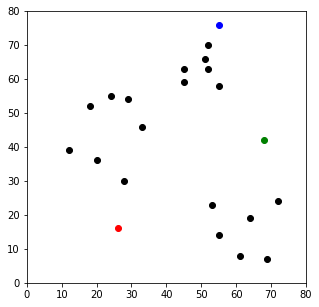

In [8]:
### Intialization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## the matplotlib inline will actually show the matplotlib

df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})


np.random.seed(200)
k = 3
#centroids[i] = [x,y]
#very strange way of making this
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}
print(centroids)


fig= plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {1: 'r',2 : 'g', 3 : 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()



    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


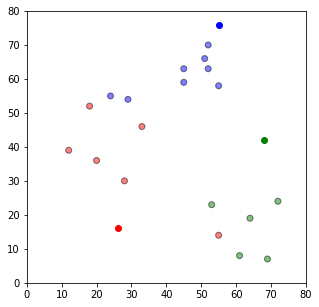

In [9]:
## Assignment Stage

def assignment(df,centroids):
    for i in centroids.keys(): # either 1,2,or 3 because of the i+1
        #sqrt((x1-x2)^2 + (y1-y2)^2) # equation we are using
        df['distance_from_{}'.format(i)] = (
            np.sqrt(   # This part gives you the distance of each point to that of the specific centroid. np makes it so you can actually use array multiplication
                (df['x'] - centroids[i][0])**2
                + (df['y']- centroids[i][1])**2
                
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()] # gets the column headings
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1) # gets column with minimum number
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # strips the string part
    df['color'] = df['closest'].map(lambda x: colmap[x]) # puts a color for it
    return df

df = assignment(df,centroids)
print(df.head())

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color= df['color'], alpha = 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()



     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  36        20.880613        48.373546        53.150729        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
5   33  46        30.805844        35.227830        37.202150        1     r
14  55  14        29.068884        30.870698        62.000000        1     r


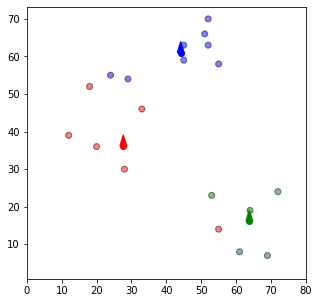

In [13]:
# update Stage
import copy

old_centroids = copy.deepcopy(centroids) 
print(df[df['closest'] == 1]) # very interesting that you can do this to sort a list or filter
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0.80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0])* 0.75
    dy = (centroids[i][1] - old_centroids[i][1])*0.75
    ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc=colmap[i], ec=colmap[i])
    
plt.show()

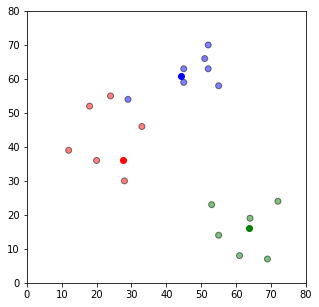

In [4]:
## repeat Assignment Stage

df = assignment(df, centroids)

# Plot results

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [5]:
# now k-means using skit
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

{1: 'r', 2: 'g', 3: 'b'}


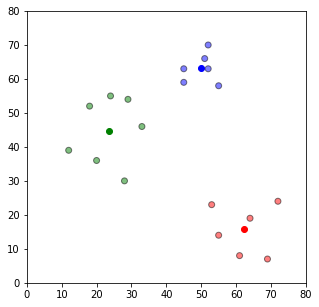

In [7]:
fig = plt.figure(figsize = (5,5))

print(colmap)
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

plt.scatter(df['x'], df['y'], color = colors1, alpha=0.5, edgecolor = 'k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)

plt.show()